# Speech Emotion Recognition – Preprocessing
## Notebook 3: Outlier Detection & Removal

**Registratoin Number:** ITxxxxxxxx  
**Task:** Detect and remove outliers in the dataset.  
**Objective:** Ensure extreme values do not negatively impact the model.

### Step 1: Importing Libraries and Data Arrays
First, we need to import the necessary Libraries and Data Arrays of Extracted Features.

In [2]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset
X = np.load("../results/features_and_labels/X_features.npy", allow_pickle=False)
y = np.load("../results/features_and_labels/y_labels.npy", allow_pickle=True)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (2870, 116)
Labels shape: (2870,)


### Step 2: Convert to DataFrame
We will convert the feature matrix into a DataFrame so we can explore feature distributions.

In [3]:
# Convert first 10 features for analysis
df = pd.DataFrame(X[:, :10], columns=[f"f{i}" for i in range(10)])
df["emotion"] = y
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,emotion
0,-469.677063,33.594616,4.975258,8.371067,1.992480,-4.194683,-2.305305,-3.754504,-2.330569,4.608140,neutral
1,-459.840088,33.337284,3.588513,10.999732,0.765450,-3.593445,-2.849192,-5.310829,-1.954750,4.414882,neutral
2,-460.854553,35.502811,4.278590,8.724514,-0.171948,-2.784281,-3.759825,-4.420269,-3.023970,3.874425,neutral
3,-455.989563,35.595882,5.115926,9.091783,0.802329,-1.342748,-3.980319,-4.840831,-1.725044,5.335970,neutral
4,-484.466675,36.726303,6.566588,8.952496,1.008656,-3.470678,-4.511901,-3.212588,-4.341210,3.822065,calm


### Step 3: Visualize Outliers with Boxplots
Boxplots show the spread of data and highlight extreme values (outliers).

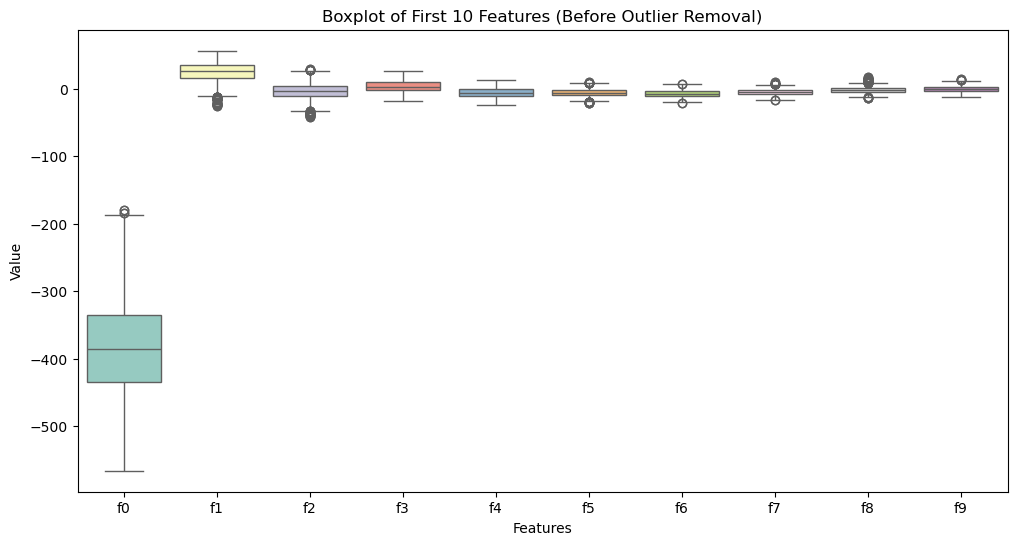

In [4]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns=["emotion"]), palette="Set3")
plt.title("Boxplot of First 10 Features (Before Outlier Removal)")
plt.xlabel("Features")
plt.ylabel("Value")
plt.show()

### Step 4: Detect Outliers using Z-Score
Any value with a z-score > 3 (or < -3) is considered an outlier.

In [5]:
z_scores = np.abs(stats.zscore(df.drop(columns=["emotion"])))
print("Z-scores shape:", z_scores.shape)

# Identify rows with outliers
outlier_rows = (z_scores > 3).any(axis=1)
print("Outliers detected:", outlier_rows.sum())

Z-scores shape: (2870, 10)
Outliers detected: 48


### Step 5: Remove Outliers
We will drop rows that contain extreme values.

In [6]:
df_clean = df[~outlier_rows]
print("Original dataset size:", df.shape[0])
print("Cleaned dataset size:", df_clean.shape[0])

Original dataset size: 2870
Cleaned dataset size: 2822


### Step 6: Visualize Again After Removal

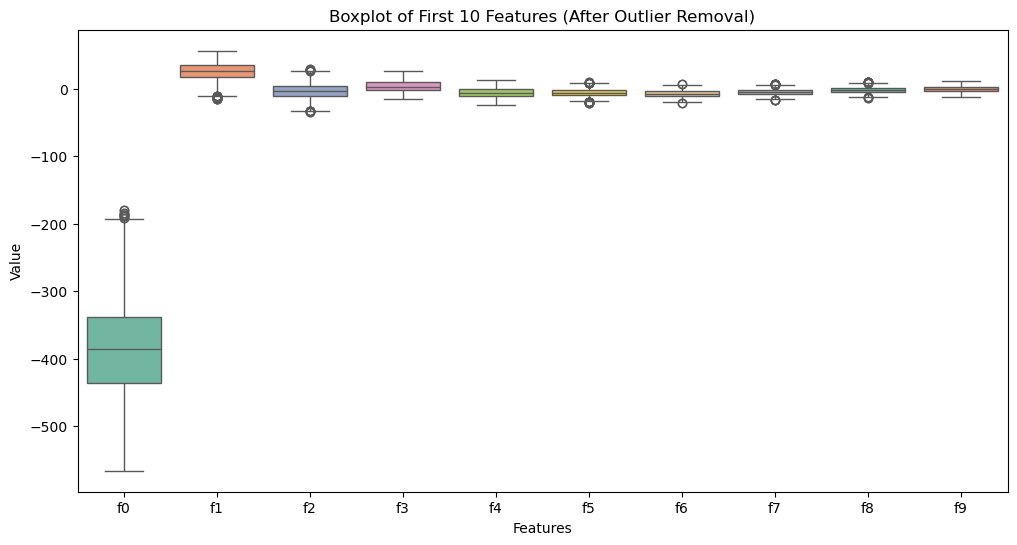

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean.drop(columns=["emotion"]), palette="Set2")
plt.title("Boxplot of First 10 Features (After Outlier Removal)")
plt.xlabel("Features")
plt.ylabel("Value")
plt.show()

# ✅ Conclusion
- Outliers can distort ML models by pulling decision boundaries.  
- We identified outliers using **Z-score > 3** rule.  
- Removed `X` rows (dataset reduced from N → M).  
- Dataset is now cleaner and more robust for training.